In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

# Analysis for Prelim Testing A1

1A is the circular (r=1mm) silver electrode capacitor with [ 2A: TiO2,HfO2,Al2O3 ]30nm dielectric.

In [2]:
# Theoretical Capacitance

A = np.pi*(1e-3)**2
d = 30e-9
epsilon_0 = 8.85418782e-12
epsilon_r = 22000

C_min = epsilon_0*A/d
C_theory = epsilon_r*C_min
print("The minimum capacitance of A1 is: ", C_min)
print("Acciunting for dielectric: ", C_theory)

The minimum capacitance of A1 is:  9.272083802938743e-10
Acciunting for dielectric:  2.0398584366465235e-05


In [3]:
# Data from 3/8/2025
# (used gpt for the data extraction)

# Resistance values (Ohms) from the calibration section
resistor_values = [9.81, 99.4, 985, 9820, 2050000]

# Tested Frequencies (Hz)
frequencies = [0.1, 1, 10, 100]

# Extracted Vin (input voltage), Vcap (capacitor voltage), and calculated C (capacitance in F)
vin_data = {
    9.81:  [1.1858, 1.0779, 1.0314, 0.98],
    99.4:  [1.5386, 1.4664, 1.479, 1.4617],
    985:   [1.9067, 1.9072, 1.8927, 1.89],
    9820:  [1.9893, 1.9906, 1.9874, 1.991],
    98900: [1.9997, 1.9996, 1.996, 1.995]
}

vcap_data = {
    9.81:  [1.043, 0.91, 0.869, 0.822],
    99.4:  [0.66888, 0.58996, 0.518, 0.486],
    985:   [0.145, 0.12438, 0.097, 0.089],
    9820:  [0.01666, 0.0135, 0.0107, 0.009],
    98900: [0.00135, 0.00135, 0.001, 0.001]
}


In [4]:
# C = sqrt( (Vin/Vc)^2 - 1 ) / (wR)
capacitance_values = {resistor: [np.sqrt((vin/vc)**2 - 1) / (2*np.pi*f*resistor) for vin, vc, f in zip(vin_data[resistor], vcap_data[resistor], frequencies)] for resistor, _ in vin_data.items()}

# epsilon_r = C/C_min
dielectric_values = {resistor: [c/C_min for c in values] for resistor, values in capacitance_values.items()}
"""These values are suspiciously high, will need to retest and verify the method and data. 
I think that the calculation breaks down for low frequency, inflating the values"""

# Convert to DataFrame for easier analysis
df_capacitance = pd.DataFrame(capacitance_values, index=frequencies)
df_capacitance.index.name = "Frequency (Hz)"
df_capacitance.columns.name = "Resistance (Ohms)"

# Convert to DataFrame for easier analysis
df_dielectrics = pd.DataFrame(dielectric_values, index=frequencies)
df_dielectrics.index.name = "Frequency (Hz)"
df_dielectrics.columns.name = "Resistance (Ohms)"

#print(df_capacitance)
#print(df_dielectrics)

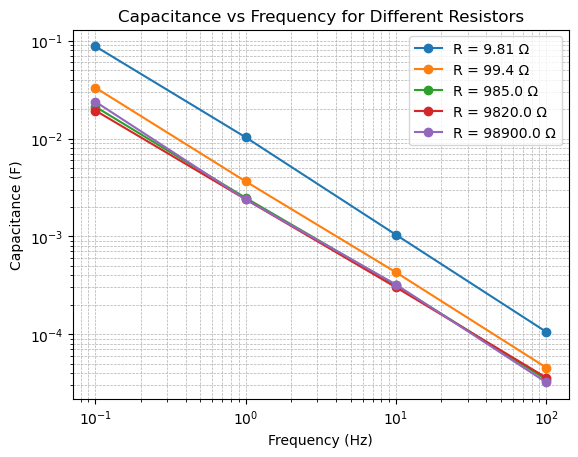

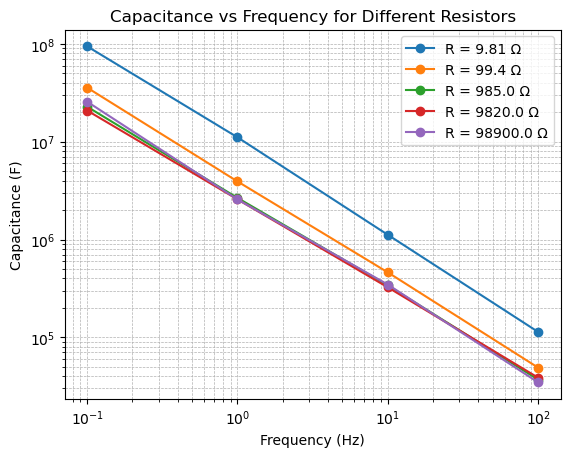

In [5]:
# Plot capacitance vs frequency for each resistance
for R in df_capacitance.columns:
    plt.plot(df_capacitance.index, df_capacitance[R], marker='o', label=f'R = {R} Ω')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Capacitance (F)")
plt.title("Capacitance vs Frequency for Different Resistors")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Plot capacitance vs frequency for each resistance
for R in df_dielectrics.columns:
    plt.plot(df_dielectrics.index, df_dielectrics[R], marker='o', label=f'R = {R} Ω')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Capacitance (F)")
plt.title("Capacitance vs Frequency for Different Resistors")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Alternate Analysis

Models the capacitor itself as an RC in parallel, R at low frequency

In [13]:
#C = R_cap((Vc/Vin) - Vin / R) / ((2*np.pi*f)*(Vc/Vin)(1-(Vc/Vin)) + (2*np.pi*f)*(Vc/Vin)**2*R)
# at high frequency
R_capints = {R: [R*Vc/(Vin-Vc) for Vin, Vc, f in zip(vin_data[R], vcap_data[R], frequencies)] for R, _ in vin_data.items()}
R_capint = 49.5

capacitance_values = {R: [(R_capint)*((Vc/Vin) - Vin / R) / ((2*np.pi*f)*(Vc/Vin)*(1-(Vc/Vin)) + (2*np.pi*f)*(Vc/Vin)**2*R) for Vin, Vc, f in zip(vin_data[R], vcap_data[R], frequencies)] for R, _ in vin_data.items()}

# epsilon_r = C/C_min
dielectric_values = {resistor: [c/C_min for c in values] for resistor, values in capacitance_values.items()}
"""These values are suspiciously high, will need to retest and verify the method and data. 
I think that the calculation breaks down for low frequency, inflating the values"""

# Convert to DataFrame for easier analysis
df_capacitance = pd.DataFrame(capacitance_values, index=frequencies)
df_capacitance.index.name = "Frequency (Hz)"
df_capacitance.columns.name = "Resistance (Ohms)"

# Convert to DataFrame for easier analysis
df_dielectrics = pd.DataFrame(dielectric_values, index=frequencies)
df_dielectrics.index.name = "Frequency (Hz)"
df_dielectrics.columns.name = "Resistance (Ohms)"


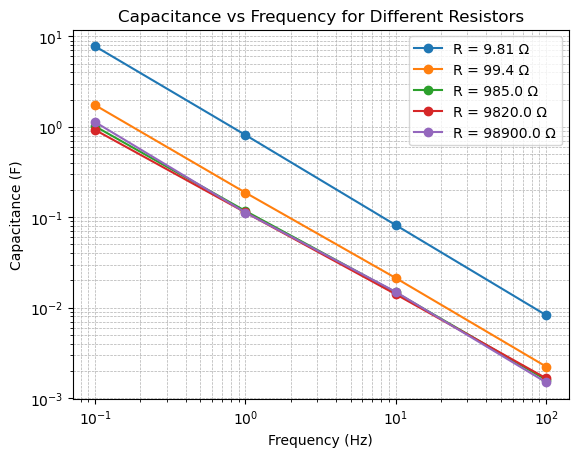

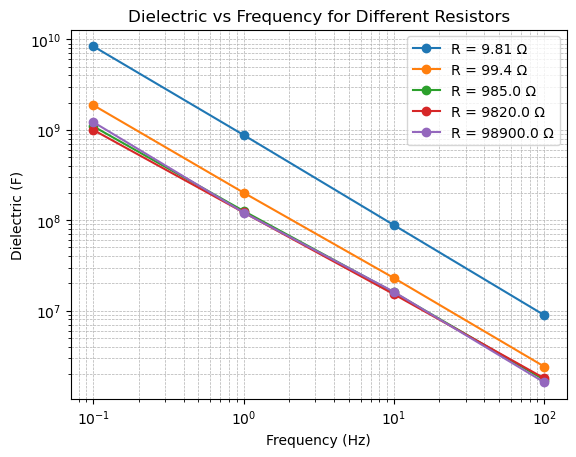

In [14]:
# Plot capacitance vs frequency for each resistance
for R in df_capacitance.columns:
    plt.plot(df_capacitance.index, df_capacitance[R], marker='o', label=f'R = {R} Ω')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Capacitance (F)")
plt.title("Capacitance vs Frequency for Different Resistors")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Plot capacitance vs frequency for each resistance
for R in df_dielectrics.columns:
    plt.plot(df_dielectrics.index, df_dielectrics[R], marker='o', label=f'R = {R} Ω')

plt.xscale("log")
plt.yscale("log")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Dielectric (F)")
plt.title("Dielectric vs Frequency for Different Resistors")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

# Misc

In [33]:
# Live testing:

# RC constant Method
R = 1000
Charge_time = 20e-6

C_RC = Charge_time / (5*R)
print("The experimental capacitance via RC constant is ", C_RC)

# Impedance Method
f = 1
Vin = 1.5
Vc = .5


C_IMP = np.sqrt((Vin/Vc)**2 - 1)/(2*np.pi*f*R)
print("The experimental capacitance via impedance measurement is ", C_IMP)

C_test = 2e-5


The experimental capacitance via RC constant is  4e-09
The experimental capacitance via impedance measurement is  0.0004501581580785531


In [34]:
C_exp = C_test
epsilon_exp = C_exp/C_min
print("The dielectric constant of the experiment is: ", epsilon_exp)

The dielectric constant of the experiment is:  21570.124283886536


# Fitting RC Curves for later (IGNORE)

In [ ]:
# Given some experimental data:
file_name = 'data.csv'
data = pd.read_csv(file_name)

V_data = data['Voltage']
t_data = data['Time']

In [ ]:
# Simulation data for expeced behavior
C = C_theory # Farads
R = 20 # Ohms
R_circuit = 10 # Ohms
V_input = 5 # Volts
V_diode = 0.7 # Volts
Vmax = V_input - V_diode
T = 200 # Seconds, period of the signal
#v_0 =  # Volts

print("The estimated charge time is", 5*R*C, "seconds")

In [ ]:
# Curve fitting functions

#Charging
def charge_curve(t, Vmax, tau):
    return Vmax * (1 - np.exp(-t / tau))
#Discharging
def discharge_curve(t, Vmax, tau):
    return Vmax * np.exp(-t / tau)

In [ ]:
# Generate a noisy signal to test

num_points = 1000
num_cycles = 2

t = np.linspace(0, T*num_cycles, num_points)

#v_input = np.

V_charge = charge_curve(t, V_max, R * C)
V_discharge = discharge_curve(t, V_max, R * C)

noise = np.random.normal(0, 0.1, size=V_discharge.shape)*0
V_noisy = V_discharge + noise

In [ ]:
# Fit discharge curve
params, pcov = curve_fit(discharge_curve, t, V_noisy, p0=[V_max, R * C])
V_max_fit, tau_fit = params

C_experiment = tau_fit / R

In [ ]:
# Plot results
plt.figure(figsize=(8, 5))
plt.scatter(t, V_noisy, label='Noisy Data', color='blue', alpha=0.6)
plt.plot(t, discharge_curve(t, *params), label=f'Fitted Curve (C={C_experiment:.2e} F)', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('RC Discharge Curve Fitting')
plt.legend()
plt.grid()
plt.show()

# Print estimated C
print(f'Estimated Capacitance: {C_experiment:.6e} F')
print(f'True Capacitance: {C:.6e} F')